# IR Lab

Notebook destinado a desenvolver o meu primeiro interpretador de impulse response.

In [1]:
import os, math
import numpy as np

## WAV File

Tratando o arquivo wav.

## Transformando os pacotes de bytes em inteiro

In [2]:
def binary_to_integer(num):
    it = len(num)
    r = 0
    for i in range(0, it):
        r = r + (num[i] << (8 * i))
    return r

## Função que interpreta o arquivo wav

In [3]:
def wav_file(file):
    resp ={
    "ID" : file[0:4],
    "size" : file[4:8],
    "format" : file[8:12],
    "sub_chunk_1_id" : file[12:16],
    "sub_chunk_1_size" : file[16:20],
    "audio_format" : file[20:22],
    "num_channels" : file[22:24],
    "sample_rate" : file[24:28],
    "byte_rate" : file[28:32],
    "block_align" : file[32:34],
    "bits_per_sample" : file[34:36],
    #"sub_chunk_2_id" : file[728:732],
    #"sub_chunk_2_size" : file[732:736],
    #"sub_chunk_2_id" : b'',
    #"sub_chunk_2_size" : b'',
    #"data" : b''a
    }
    for i in range(36, len(file)):
        if (file[i:i+4] == b'data'):
            resp.update({
                "sub_chunk_2_id": file[i:(i+4)], 
                "sub_chunk_2_size": file[(i+4):(i+8)]
            })
            data = (i+8)
    
    bytes_n = int(binary_to_integer(resp["bits_per_sample"]) / 8)
    print("Bytes :" + str(bytes_n))
    if binary_to_integer(resp["num_channels"]) == 2:
        print("File Stereo n de iteracoes: " + str(len(file[data:]) / 2))

        left = b'0'
        right = b'0'
        for i in range(0, int(len(file[data:]) / 2), int(2*bytes_n)):
            left = left + file[(data + i):(data + i + bytes_n)]
            right = right + file[(data + i + bytes_n): (data + i + int(2*bytes_n)) ]
        resp.update({
            "data_left" : left,
            "data_right": right
        })
        
    else:
        print("File Mono")
        resp.update({"data" : file[data:]})
    return (resp)

def create_data(data, format_data=24):
    n_byte = int(format_data / 8)
    ma = int(pow(2, format_data))
    r = []
    for d in data:
        if d < 0:
            d = d + ma
        for i in range(0, n_byte):
            r.append(int(d) >> (8 * i) & 255)
        
    return r

## Convertendo o valor Binário em Sinal

In [4]:
def data_converter_integer(dt, format_data=24):
    resp_data = []
    interv = int(format_data / 8)
    if interv > len(dt):
        interv = len(dt)
    for i in range(0, len(dt), interv):
        value = []
        for j in range(0, interv):
            if(i + j) < len(dt):
                value.append(dt[i+j])
        val_int = binary_to_integer(value)
        resp_data.append(val_int)
    return resp_data

def byte_db(dt, format_data):
    resp = []
    ma = int(pow(2, format_data))
    for r in dt:
        if (r > (ma / 2)):
            r = r - ma
        resp.append(r)
    return resp

## IR - Application

In [5]:
def convolution(ir, sign):
    rdc = abs(max(sign) - min(sign)) * 10
    resp = []
    for i in range(0, len(sign)):
        r = 0
        rj = i
        if i > len(ir):
            rj = len(ir)
        for j in range(0, rj):
            r = r + (ir[j] * sign[i - j])
        resp.append(r / rdc)
    return resp

## Tratando os arquivos de teste

In [6]:
file_example = open(os.path.abspath(os.getcwd()) +"/../IR/57_2_inch_cone_far_pres_4.wav", "rb")
file_example2 = open(os.path.abspath(os.getcwd()) +"/../IR/IMreverbs/Scala Milan Opera Hall.wav", "rb")
#file_example = open(os.path.abspath(os.getcwd()) +"/../IR/U87_grill_cap_pres_1.wav", "rb")
file_line = open(os.path.abspath(os.getcwd())+"/../data/line.wav", "rb")
#file_line = open(os.path.abspath(os.getcwd())+"/output.wav", "rb")
ir_wav = file_example.read()
ir_wav2 = file_example2.read()
guitar_line = file_line.read()
original = guitar_line

guitar_line = wav_file(guitar_line)
print("-- Guitar Sample --")
print("ID: " + str(guitar_line["ID"]))
print("Size: " + str(binary_to_integer(guitar_line["size"])))
print("format: " + str(guitar_line["format"]))
print("sub_chunk_1_id: " + str(guitar_line["sub_chunk_1_id"]))
print("sub_chunk_1_size: " + str(binary_to_integer(guitar_line["sub_chunk_1_size"])))
print("audio_format: " + str(binary_to_integer(guitar_line["audio_format"])))
print("Channels: " + str(binary_to_integer(guitar_line["num_channels"])))
print("Sample rate: " + str(binary_to_integer(guitar_line["sample_rate"])))
print("Byte Rate: " + str(binary_to_integer(guitar_line["byte_rate"])))
print("block_align: " + str(binary_to_integer(guitar_line["block_align"])))
print("Bits por sample: " + str(binary_to_integer(guitar_line["bits_per_sample"])))
print("Sub_Chunk: " + str(guitar_line["sub_chunk_2_id"]))
print("Size: " + str(binary_to_integer(guitar_line["sub_chunk_2_size"])))
print()
ir_wav = wav_file(ir_wav)
print("-- IR Sample --")
print("ID: " + str(ir_wav["ID"]))
print("Size: " + str(binary_to_integer(ir_wav["size"])))
print("format: " + str(ir_wav["format"]))
print("sub_chunk_1_id: " + str(ir_wav["sub_chunk_1_id"]))
print("sub_chunk_1_size: " + str(binary_to_integer(ir_wav["sub_chunk_1_size"])))
print("audio_format: " + str(binary_to_integer(ir_wav["audio_format"])))
print("Channels: " + str(binary_to_integer(ir_wav["num_channels"])))
print("Sample rate: " + str(binary_to_integer(ir_wav["sample_rate"])))
print("Byte Rate: " + str(binary_to_integer(ir_wav["byte_rate"])))
print("block_align: " + str(binary_to_integer(ir_wav["block_align"])))
print("Bits por sample: " + str(binary_to_integer(ir_wav["bits_per_sample"])))
print("Sub_Chunk: " + str(ir_wav["sub_chunk_2_id"]))
print("Size: " + str(binary_to_integer(ir_wav["sub_chunk_2_size"])))
print()
ir_wav2 = wav_file(ir_wav2)
print("-- IR2 Sample --")
print("ID: " + str(ir_wav2["ID"]))
print("Size: " + str(binary_to_integer(ir_wav2["size"])))
print("format: " + str(ir_wav2["format"]))
print("sub_chunk_1_id: " + str(ir_wav2["sub_chunk_1_id"]))
print("sub_chunk_1_size: " + str(binary_to_integer(ir_wav2["sub_chunk_1_size"])))
print("audio_format: " + str(binary_to_integer(ir_wav2["audio_format"])))
print("Channels: " + str(binary_to_integer(ir_wav2["num_channels"])))
print("Sample rate: " + str(binary_to_integer(ir_wav2["sample_rate"])))
print("Byte Rate: " + str(binary_to_integer(ir_wav2["byte_rate"])))
print("block_align: " + str(binary_to_integer(ir_wav2["block_align"])))
print("Bits por sample: " + str(binary_to_integer(ir_wav2["bits_per_sample"])))
print("Sub_Chunk: " + str(ir_wav2["sub_chunk_2_id"]))
print("Size: " + str(binary_to_integer(ir_wav2["sub_chunk_2_size"])))

Bytes :3
File Mono
-- Guitar Sample --
ID: b'RIFF'
Size: 794528
format: b'WAVE'
sub_chunk_1_id: b'fmt '
sub_chunk_1_size: 16
audio_format: 1
Channels: 1
Sample rate: 44100
Byte Rate: 132300
block_align: 3
Bits por sample: 24
Sub_Chunk: b'data'
Size: 793800

Bytes :3
File Mono
-- IR Sample --
ID: b'RIFF'
Size: 3800
format: b'WAVE'
sub_chunk_1_id: b'fmt '
sub_chunk_1_size: 16
audio_format: 1
Channels: 1
Sample rate: 44100
Byte Rate: 132300
block_align: 3
Bits por sample: 24
Sub_Chunk: b'data'
Size: 3072

Bytes :2
File Stereo n de iteracoes: 177188.0
-- IR2 Sample --
ID: b'RIFF'
Size: 354412
format: b'WAVE'
sub_chunk_1_id: b'fmt '
sub_chunk_1_size: 16
audio_format: 1
Channels: 2
Sample rate: 44100
Byte Rate: 176400
block_align: 4
Bits por sample: 16
Sub_Chunk: b'data'
Size: 354376


In [7]:
data_guitar = data_converter_integer(guitar_line["data"], binary_to_integer(guitar_line["bits_per_sample"]))
data_guitar = byte_db(data_guitar, binary_to_integer(guitar_line["bits_per_sample"]))

In [8]:
# IR Mono
data_ir = data_converter_integer(ir_wav["data"], binary_to_integer(ir_wav["bits_per_sample"]))
data_ir = byte_db(data_ir, binary_to_integer(ir_wav["bits_per_sample"]))

#IR Stereo
data_ir2_l = data_converter_integer(ir_wav2["data_left"], binary_to_integer(ir_wav2["bits_per_sample"]))
data_ir2_r = data_converter_integer(ir_wav2["data_right"], binary_to_integer(ir_wav2["bits_per_sample"]))
data_ir2_l = byte_db(data_ir, binary_to_integer(ir_wav2["bits_per_sample"]))
data_ir2_r = byte_db(data_ir, binary_to_integer(ir_wav2["bits_per_sample"]))

In [9]:
import matplotlib.pyplot as plt
x = [0]
for i in range(1, len(data_guitar)):
    x.append( x[i-1] + (1 / binary_to_integer(guitar_line["sample_rate"])) )
x_1 = [0]
for i in range(1, len(data_ir)):
    x_1.append( x_1[i-1] + (1 / binary_to_integer(ir_wav["sample_rate"])) )
x_2 = [0]
for i in range(1, len(data_ir)):
    x_2.append( x_2[i-1] + (1 / binary_to_integer(ir_wav2["sample_rate"])) )

# Guitar Signal

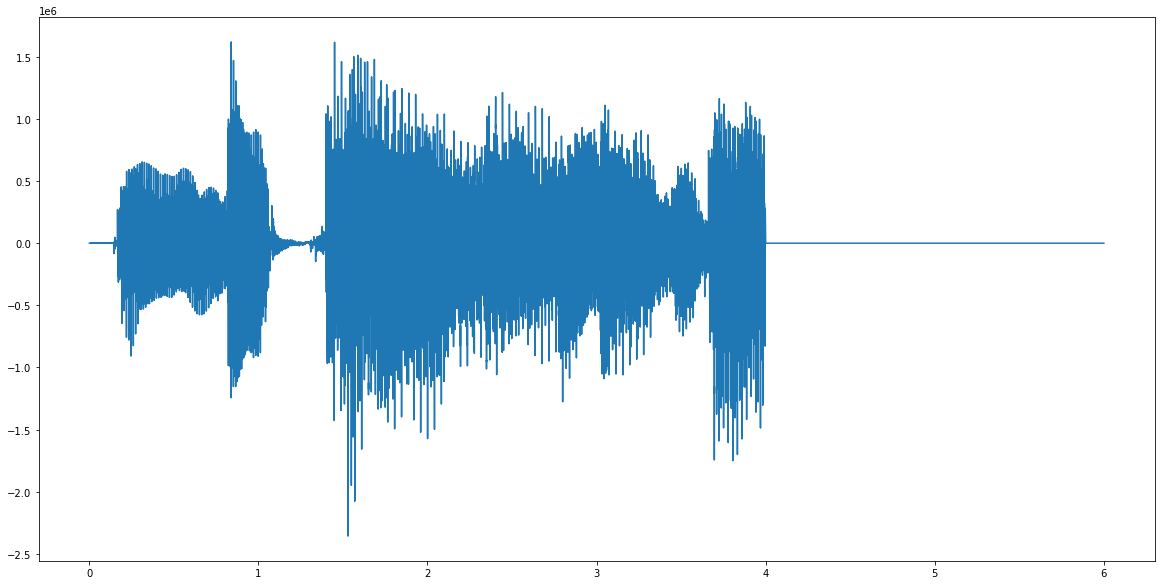

In [10]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(x, data_guitar)
plt.show()

# IR Signal

## Impulse Response - Mono

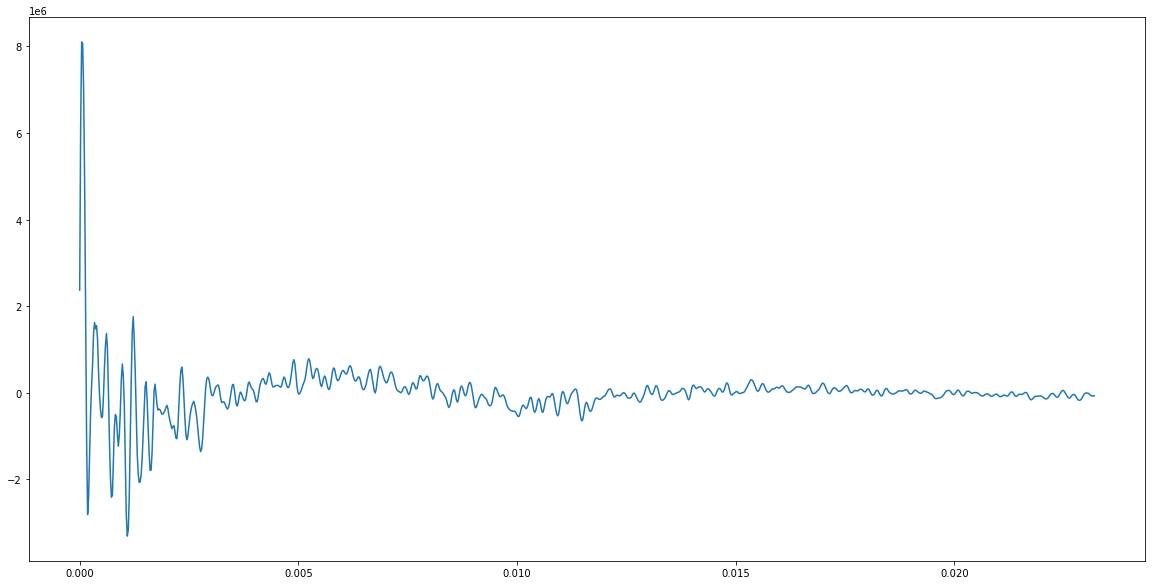

In [11]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(x_1, data_ir)
plt.show()

## Impulse Response - Stereo

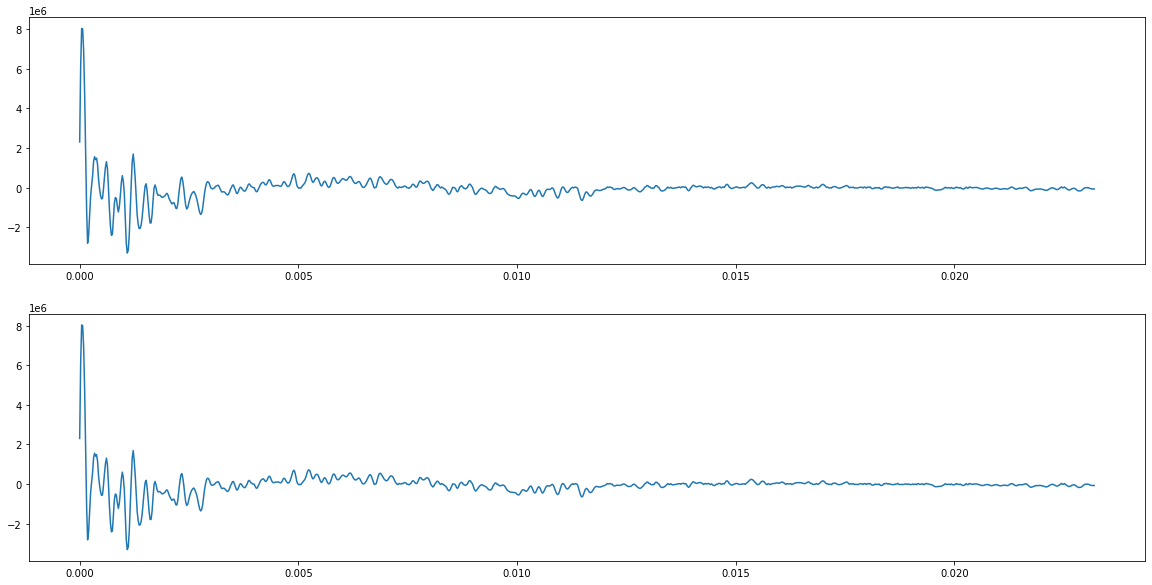

In [12]:
figure, axis = plt.subplots(2)
plt.rcParams['figure.figsize'] = [20, 10]

axis[0].plot(x_2, data_ir2_l)
axis[1].plot(x_2, data_ir2_r)
plt.show()

# Convolution

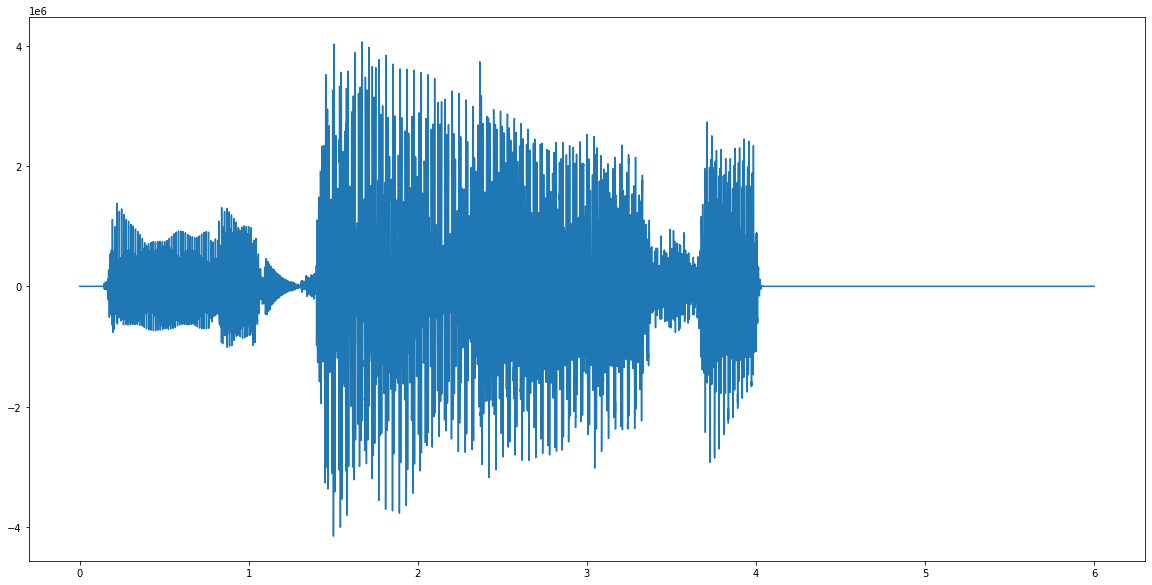

In [13]:
data_ir_res = convolution(data_ir, data_guitar)
data_ir_res = convolution(data_ir2_l, data_ir_res)

plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(x, data_ir_res)
plt.show()

# Create Wave File

In [14]:
data = create_data(data_ir_res, binary_to_integer(guitar_line["bits_per_sample"]))
new_file = original[0:736] + bytes(data)
f = open("output.wav", "wb")
f.write(new_file)
f.close()